In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data

#Worldcup matches

df_matches = pd.read_csv('C:\\Users\\jatin\\Desktop\\Learn\\FIFA Worldcup\\Dataset\\WorldCupMatches.csv')

In [3]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [4]:
#Importing the Team players data

df_players = pd.read_csv("C:\\Users\\jatin\\Desktop\\Learn\\FIFA Worldcup\\Dataset\\WorldCupPlayers.csv", index_col = 'RoundID')

In [5]:
df_players

,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
RoundID,,,,,,,,
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...
255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'


In [6]:
#Importing the Worldcup winners data

df_worldcup = pd.read_csv("C:\\Users\\jatin\\Desktop\\Learn\\FIFA Worldcup\\Dataset\\WorldCups.csv")

In [7]:
df_worldcup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


# Number of people weho attended the world cup from 1930 - 2014

Text(0.5, 1.0, 'Total attendance in World cup from 1930 - 2014')

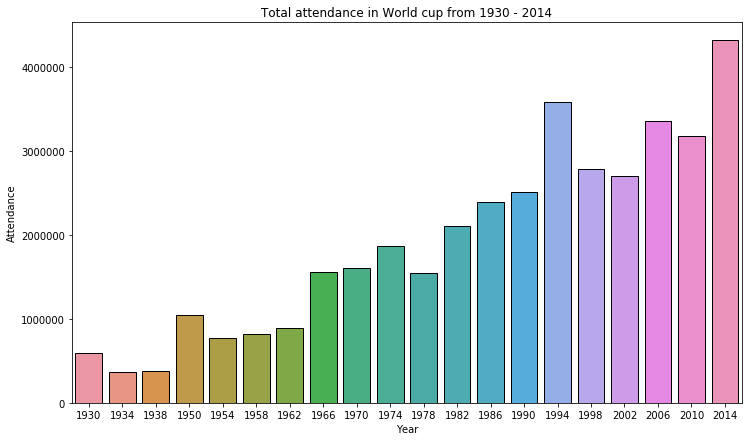

In [8]:
#Attenadance in every worldcup

Crowd = df_matches.groupby("Year")["Attendance"].sum().reset_index()
Crowd["Year"] = Crowd["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(Crowd["Year"],Crowd["Attendance"],linewidth=1, edgecolor='black')
plt.title("Total attendance in World cup from 1930 - 2014", color = 'black')

# Worldcup Matches with Maximum Attendance


In [74]:
matches_attendance_max = df_matches.groupby('Attendance')[('Home Team Name', 'Away Team Name')].max().reset_index()
matches_attendance_max = matches_attendance_max.sort_values(by='Attendance', ascending= False)

matches_attendance_max["team"] = matches_attendance_max["Home Team Name"] + " VS " + matches_attendance_max["Away Team Name"]

matches_attendance_max[0:10]

,Attendance,Home Team Name,Away Team Name,team
621,173850.0,Uruguay,Brazil,Uruguay VS Brazil
620,152772.0,Brazil,Spain,Brazil VS Spain
619,142429.0,Brazil,Yugoslavia,Brazil VS Yugoslavia
618,138886.0,Brazil,Sweden,Brazil VS Sweden
617,114600.0,Mexico,Paraguay,Mexico VS Paraguay
616,114580.0,Mexico,England,Mexico VS England
615,114500.0,Argentina,Belgium,Argentina VS Belgium
614,110000.0,Belgium,Mexico,Belgium VS Mexico
613,108192.0,Mexico,Belgium,Mexico VS Belgium
612,107412.0,Brazil,Italy,Brazil VS Italy


Text(0.5, 1.0, 'Matches with Maximum Attendance')

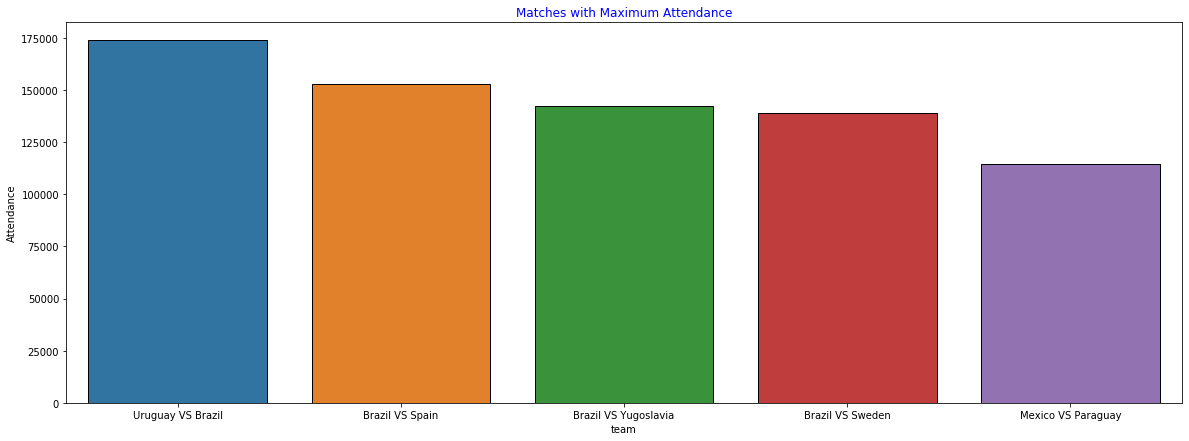

In [75]:
plt.figure(figsize=(20,7))
sns.barplot(x= "team", y = "Attendance", data = matches_attendance_max[:5], edgecolor = 'black')
plt.title("Matches with Maximum Attendance",color = 'b')

In [10]:
Home_Team = df_matches['Home Team Name'].loc[df_matches['Attendance'].idxmax()]
Away_Team = df_matches['Away Team Name'].loc[df_matches['Attendance'].idxmax()]
Max_Attendance = df_matches['Attendance'].max()

In [11]:
print('Maximum Attendance was in the match between {} vs {} with a total attendace of {}:'.format(Home_Team,Away_Team,Max_Attendance))

Maximum Attendance was in the match between Uruguay vs Brazil with a total attendace of 173850.0:


# Average Attendance in every edition of the World Cup

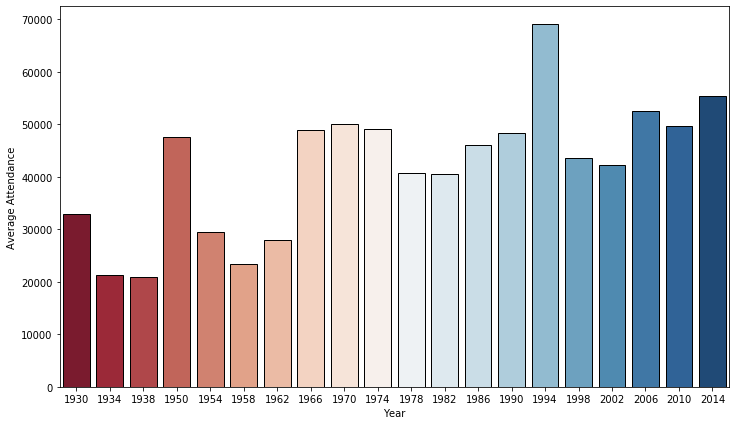

In [76]:
plt.figure(figsize=(12,7))

Avg_attendance = df_matches.groupby('Year')['Attendance'].mean().reset_index()

Avg_attendance.columns = ['Year', 'Average Attendance']

sns.barplot(x = Avg_attendance['Year'] , y = Avg_attendance['Average Attendance'], edgecolor= 'black', palette = "RdBu")

# Number of goals scored in every edition of the World Cup

Text(0.5, 1.0, 'Total Goals scored in every edition of the world cup')

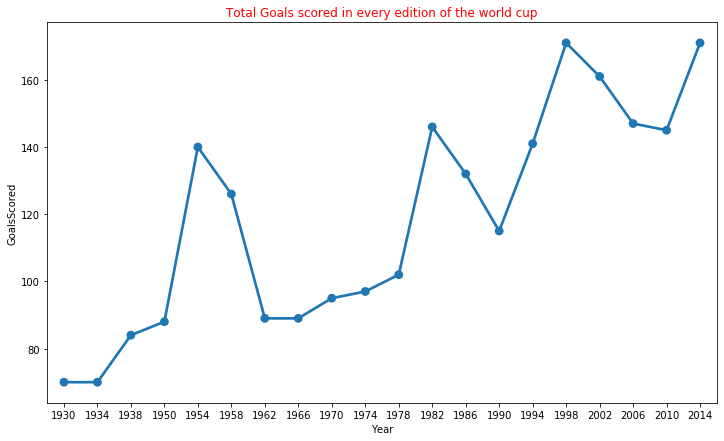

In [12]:
# Total Goals scored in a worldcup every year

plt.figure(figsize=(12,7))

sns.pointplot(x = df_worldcup['Year'], y= df_worldcup['GoalsScored'],marker = 'o')

max_goals = df_worldcup['Year'].loc[df_worldcup['GoalsScored'].idxmax()]

plt.title("Total Goals scored in every edition of the world cup", color = 'red')


As visible from the graph the maximum number of goals were scored in the year 1998 & 2014, and minimum number of goals were scored in the year 1930 and 1934

In [26]:
df3 = pd.merge(df_matches,df_players)
df3.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,MatchID,Home Team Initials,Away Team Initials,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,1096,FRA,MEX,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,1096,FRA,MEX,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,1096,FRA,MEX,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,1096,FRA,MEX,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,1096,FRA,MEX,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN



# Players who played the maximum number of matches in the World Cup

In [29]:
#df3["Player Name"] = df3["Player Name"].replace("M�LLER", "MULLER")
Players = df3['Player Name'].value_counts().reset_index()
Players.columns = ['Player Name', 'No of Matches']
Players[:5]

,Player Name,No of Matches
0,KLOSE,40
1,M�LLER,36
2,OSCAR,36
3,JULIO CESAR,34
4,RONALDO,33


Text(0.5, 1.0, 'Player with maximum number of world cup matches')

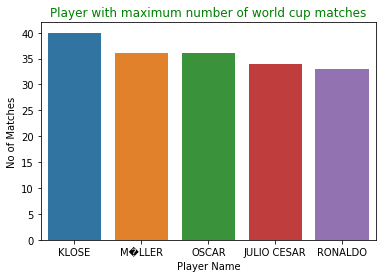

In [30]:
sns.barplot(x = 'Player Name', y= 'No of Matches', data = Players[:5])
plt.title("Player with maximum number of world cup matches", color = 'green')

# Countries that have played maximum number of matches in the worldcup

In [32]:
# Matches played by each country

hometeam = df_matches["Home Team Name"].value_counts().reset_index()
hometeam.columns = ["team","matches"]
awayteam = df_matches["Away Team Name"].value_counts().reset_index()
awayteam.columns = ["team","matches"]
total_matches = pd.concat([hometeam,awayteam],axis=0)
total_matches = total_matches.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

Text(0.5, 1.0, 'Countries with maximum number of matches in worldcup')

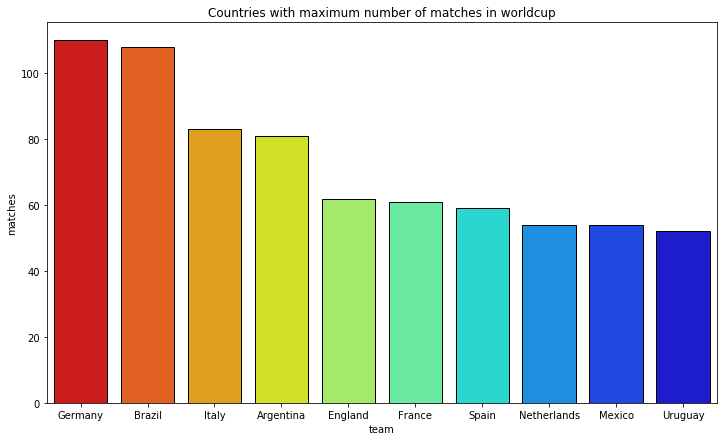

In [34]:
plt.figure(figsize=(12,7))

sns.barplot(x= 'team', y= 'matches', data = total_matches[:10], edgecolor='black', palette= 'jet_r')

plt.title("Countries with maximum number of matches in worldcup")

# Maximum number of Goals scored in Worldcup Matches

Text(0.5, 1.0, 'Maximum number of goals scored in matches')

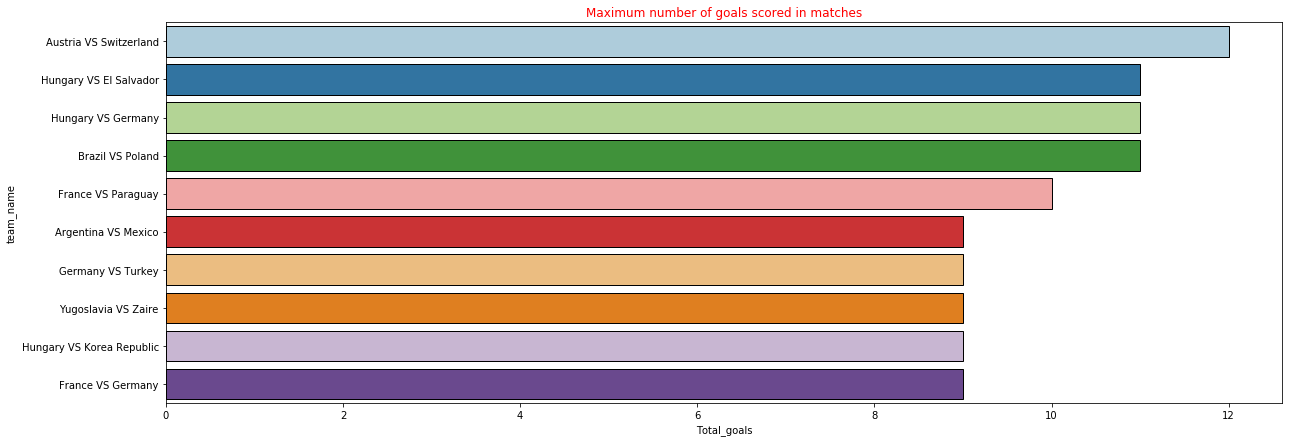

In [72]:
df_matches['Total_goals'] = df_matches["Away Team Goals"] + df_matches["Home Team Goals"]
max_goals = df_matches.sort_values(by = "Total_goals", ascending = False)

max_goals["team_name"] = max_goals["Home Team Name"] + " VS " + max_goals["Away Team Name"]

max_goals[0:10]

plt.figure(figsize=(20,7))
sns.barplot(x= "Total_goals", y = "team_name", data = max_goals[0:10],edgecolor = 'black', palette = "Paired")
plt.title("Maximum number of goals scored in matches", color = 'red')

In [73]:
# Match in which maximum number of goals were scored

#abc = df_matches['Home Team Name'].loc[df_matches['Total_goals'].idxmax()] + " Vs " + df_matches['Away Team Name'].loc[df_matches['Total_goals'].idxmax()]

# Maximum Number of Goals scored by team in World Cup history

Text(0.5, 1.0, 'Teams with maximum number of goals in worldcup history')

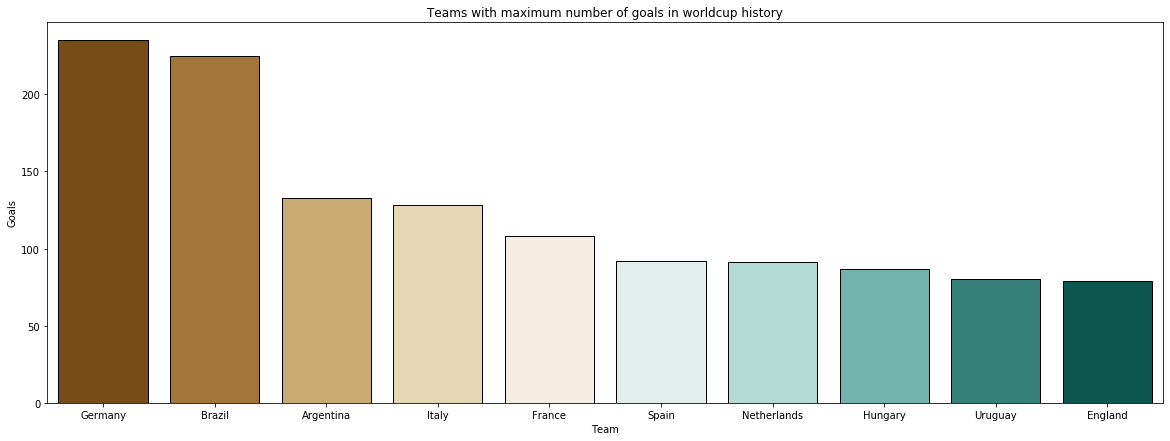

In [81]:
# Most Number of goals scored by a team in world cups

Team_goals_home = df_matches.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()
Team_goals_home.columns = ["Team", "Goals"]

Team_goals_away = df_matches.groupby('Away Team Name')['Away Team Goals'].sum().reset_index()
Team_goals_away.columns = ["Team", "Goals"]

Total_team_goals = pd.concat([Team_goals_home, Team_goals_away],axis=0)
Total_team_goals = Total_team_goals.groupby("Team")["Goals"].sum().reset_index()

Total_team_goals = Total_team_goals.sort_values(by='Goals', ascending = False)
Total_team_goals

plt.figure(figsize=(20,7))

sns.barplot(x = "Team", y = "Goals", data = Total_team_goals[0:10], edgecolor = 'black', palette = "BrBG")

plt.title("Teams with maximum number of goals in worldcup history")

# Team that has won and been runners in the worldcup maximum number of times

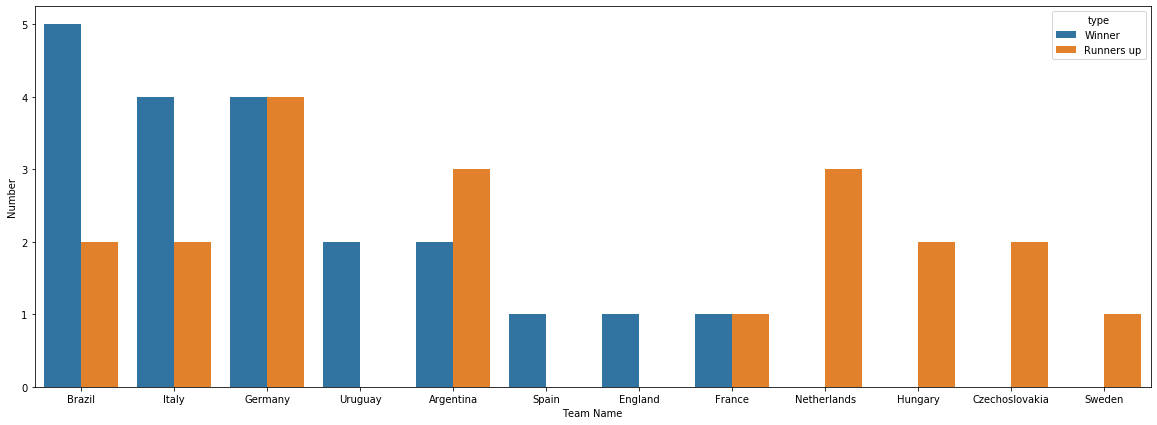

In [82]:
# Countries that won the worldcup most number of times

df_worldcup["Winner"] = df_worldcup["Winner"].replace("Germany FR","Germany")

Winner = df_worldcup["Winner"].value_counts().reset_index()
Winner.columns = ["Team Name", "Number"]

Winner["type"] = "Winner"

df_worldcup["Runners-Up"] = df_worldcup["Runners-Up"].replace("Germany FR","Germany")
Runners_up = df_worldcup["Runners-Up"].value_counts().reset_index()
Runners_up.columns = ["Team Name", "Number"]

Runners_up["type"] = "Runners up"

Worldcup = pd.concat([Winner, Runners_up],axis=0)

plt.figure(figsize=(20,7))

sns.barplot(x= Worldcup["Team Name"], y = Worldcup["Number"], hue = Worldcup['type'] )

# Cities in the world where maximum number of World cup Matches has been played

In [ ]:
## Top 10 cities where most number of matches has been played

plt.figure(figsize=(12,7))

cities = df_matches['City'].value_counts().reset_index()
cities.columns = ['City', 'Matches']



sns.barplot(x = 'Matches', y = 'City', data = cities[0:10], edgecolor = 'black', palette = 'Set3')

plt.title("Cities where maximum number of matches has been played")

# Referees that have officiated in maximum number of matches of a World Cup

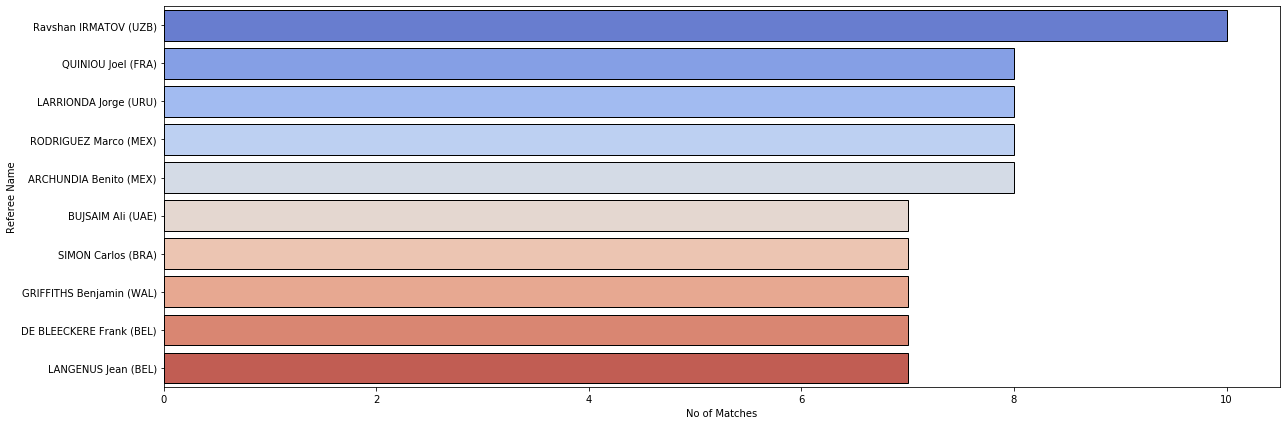

In [85]:
#Top 10 referees officiating the worldcup matches

plt.figure(figsize=(20,7))
refree = df_matches['Referee'].value_counts().reset_index()
refree

refree.columns = ['Referee Name', 'No of Matches']

refree

sns.barplot(x="No of Matches", y = "Referee Name", data = refree[0:10], edgecolor = 'black', palette = 'coolwarm')
